In [1]:
# Download the LJSpeech dataset
# Need to run this in a jupyter kernel
%%bash

if [ ! -d "./data" ]; then
    mkdir data
fi

if [ ! -d "./data/LJSpeech-1.1" ]; then
    curl -o ./data/LJSpeech-1.1.tar.bz2 https://keithito.com/LJSpeech-1.1.tar.bz2
    tar -xjf ./data/LJSpeech-1.1.tar.bz2 -C ./data
else
    echo "LJSpeech dataset already exists. Skipping download."
fi

SyntaxError: invalid syntax (3772584714.py, line 5)

In [3]:
%load_ext autoreload
%autoreload 2

from importlib import reload
from DataLoader import LJSpeechDataset, collate_fn
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import utils
from IPython.display import Audio


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/anubhav.sharma/Development/personal/1508/ECE1508/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2026-02-22 12:15:50,635 - INFO - Loading dataset from /Users/anubhav.sharma/Development/personal/1508/ECE1508/data/LJSpeech-1.1/wavs...


Current working directory: /Users/anubhav.sharma/Development/personal/1508/ECE1508/Code
Dataset path: /Users/anubhav.sharma/Development/personal/1508/ECE1508/data/LJSpeech-1.1
Number of samples in the dataset: 13100
Sample text: THE INSPECTORS PAID TRIBUTE TO THE EXCELLENCE OF THE MOTIVES OF THESE PHILANTHROPIC LADIES, AND RECOGNIZED THE GOOD THEY DID.
Sample audio shape: (158621,)


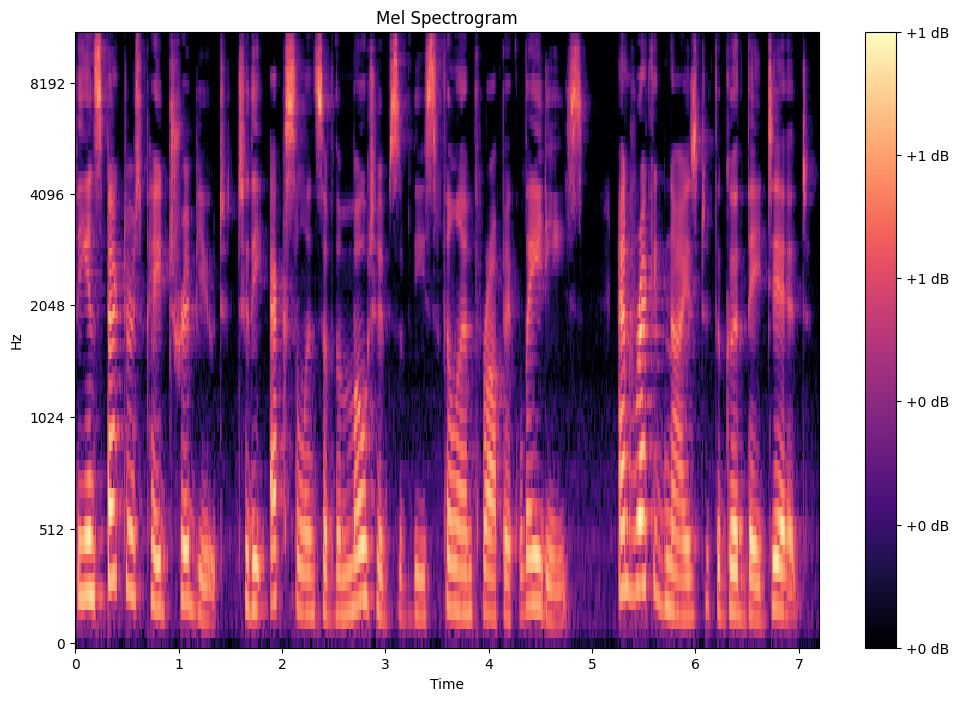

Raw text: THE INSPECTORS PAID TRIBUTE TO THE EXCELLENCE OF THE MOTIVES OF THESE PHILANTHROPIC LADIES, AND RECOGNIZED THE GOOD THEY DID.
Tokenized text: tensor([ 6, 11,  5,  4, 10,  9, 12, 23,  5, 19,  6,  8, 13, 12,  4, 23,  7, 10,
        14,  4,  6, 13, 10, 24, 16,  6,  5,  4,  6,  8,  4,  6, 11,  5,  4,  5,
        28, 19,  5, 15, 15,  5,  9, 19,  5,  4,  8, 20,  4,  6, 11,  5,  4, 17,
         8,  6, 10, 25,  5, 12,  4,  8, 20,  4,  6, 11,  5, 12,  5,  4, 23, 11,
        10, 15,  7,  9,  6, 11, 13,  8, 23, 10, 19,  4, 15,  7, 14, 10,  5, 12,
         3,  4,  7,  9, 14,  4, 13,  5, 19,  8, 21,  9, 10, 31,  5, 14,  4,  6,
        11,  5,  4, 21,  8,  8, 14,  4,  6, 11,  5, 22,  4, 14, 10, 14,  3])


In [7]:
print(f"Current working directory: {Path.cwd()}")
dataset_path = Path(Path.cwd().parent) / "data/LJSpeech-1.1"
print(f"Dataset path: {dataset_path.resolve()}")

dataset = LJSpeechDataset(dataset_path)
print(f"Number of samples in the dataset: {len(dataset)}")
if len(dataset) > 0:
    sample = dataset[0]
    print(f"Sample text: {sample.raw_text}")
    print(f"Sample audio shape: {sample.raw_audio.shape}")
else:
    print("No samples found in the dataset. Check your data directory and metadata.csv.")

loader = torch.utils.data.DataLoader(dataset, batch_size=4, collate_fn=collate_fn)

utils.plot_audio_mel_spectrogram(sample.mel_audio, sample_rate=sample.sample_rate)
print(f"Raw text: {sample.raw_text}")
print(f"Tokenized text: {sample.tokenized_text}")
Audio(sample.raw_audio, rate=sample.sample_rate)


from transformers import Wave2Vec2CTCTokenizer
tokenizer = Wave2Vec2CTCTokenizer.from_pretrained("facebook/wav2vec2-base")


In [8]:
batch = next(iter(loader))
print(f"Batch size: {len(batch)}")

print(f"Spectrograms shape: {batch['padded_spectrograms'].shape}")  # Should conform to (batch, channel, n_mels, max_time_frames)
print(f"Input (unpadded) lengths: {batch['input_lengths']}")
print(f"Packed transcripts shape: {batch['packed_transcripts'].shape}")
print(f"Target lengths: {batch['target_lengths']}")

Batch size: 4
Spectrograms shape: torch.Size([4, 1, 80, 809])
Input (unpadded) lengths: tensor([809, 620, 601, 563])
Packed transcripts shape: torch.Size([465])
Target lengths: tensor([141, 125, 101,  98])


/Users/anubhav.sharma/Development/personal/1508/ECE1508/Code/DataLoader.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


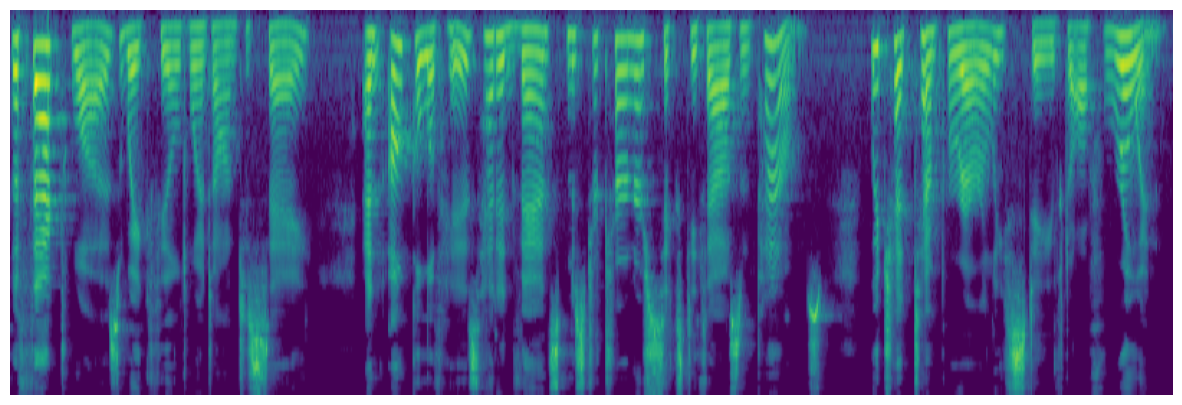

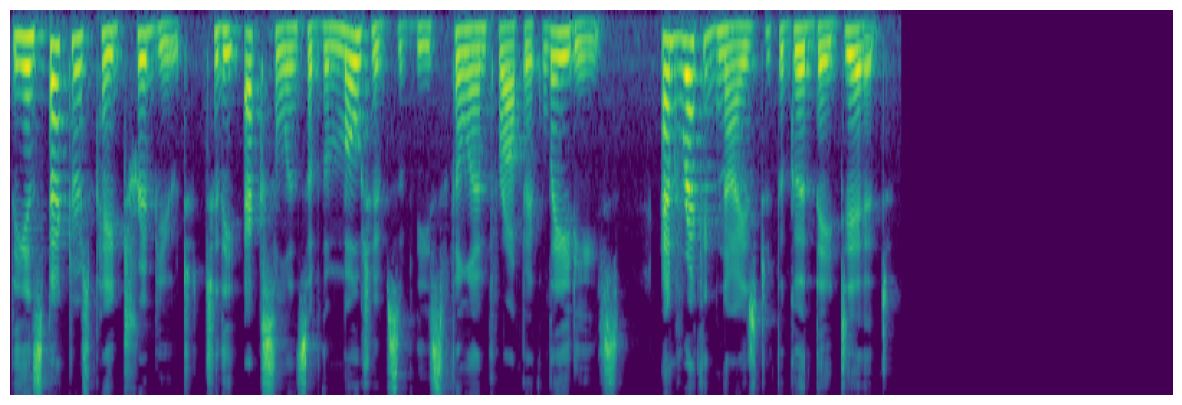

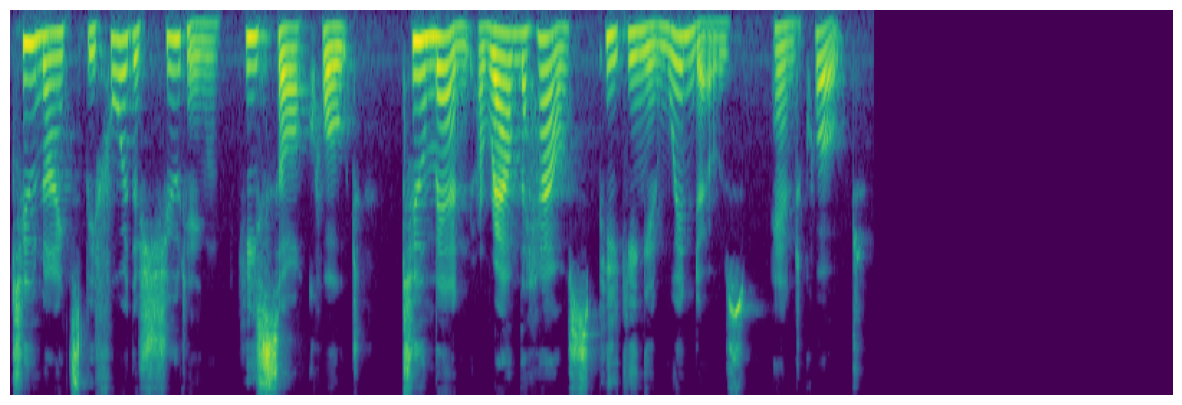

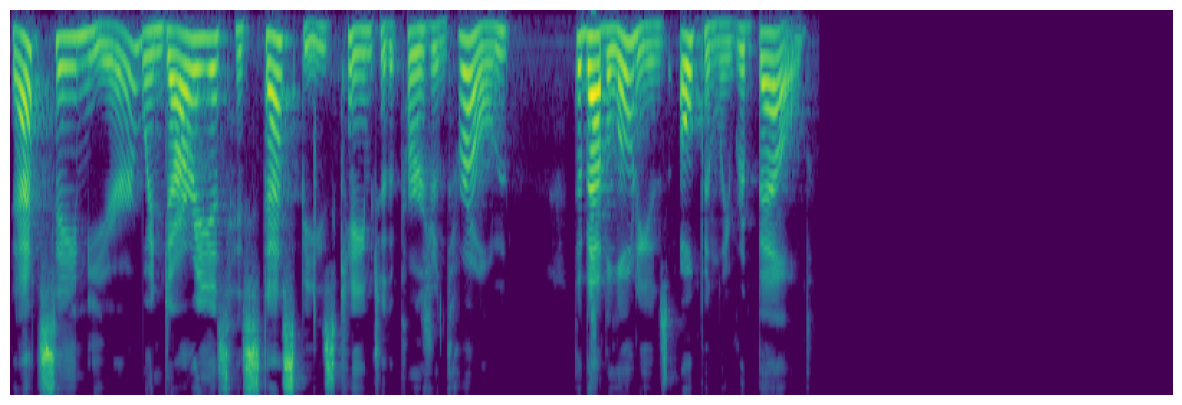

In [9]:
# Confirmation of padding
for data in batch['padded_spectrograms']:
    plt.figure(figsize=(15,5))  
    plt.imshow(data.squeeze(0).numpy(), aspect='auto', origin='lower')
    plt.axis("off")
    plt.gca().invert_yaxis()
    plt.show()